# Q 1.2

In [33]:
import numpy as np
import random
# Define the mean and standard deviation of the Gaussian distribution
sigma = [0.5,1,2,4,8]

mu1 = [-1,-1]
cov1 = np.array([[2,0.5],[0.5,1]])

mu2 = [1,-1]
cov2 = np.array([[1,-0.5],[-0.5,2]])

mu3 = [0,1]
cov3 = np.array([[1,0],[0,2]])

def generate_data(sigma):
    sample_size = 100 
    samples = np.zeros((300,2))
    y = np.zeros(300)
    samples[:100] =np.random.multivariate_normal(mu1, sigma*cov1, sample_size)
    

    samples[100:200] = np.random.multivariate_normal(mu2, sigma*cov2, sample_size)
    y[100:200] = 1

    samples[200:] = np.random.multivariate_normal(mu3, sigma*cov3, sample_size)
    y[200:] = 2

    return samples,y





import numpy as np
from sklearn.metrics import accuracy_score

class KMeans:
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
       
       
        self.centroids = np.array([X[np.random.choice(range(len(X)))]
                          for _ in range(self.n_clusters)])


        # for _ in range(1, self.n_clusters):
        #     # Calculate distances of data points to the current centroids
        #     distances = np.linalg.norm(X - np.array(self.centroids)[:, np.newaxis], axis=2)
        #     min_distances = np.min(distances, axis=0)

        #     # Calculate the next centroid using a weighted probability distribution
        #     next_centroid_probabilities = min_distances ** 2
        #     next_centroid_probabilities /= np.sum(next_centroid_probabilities)
        #     next_centroid_index = np.random.choice(range(len(X)), p=next_centroid_probabilities)
        #     self.centroids.append(X[next_centroid_index])
        
        # self.centroids = np.array(self.centroids)


        self.X = X
        
        for _ in range(self.max_iter):
            # Assign each data point to the nearest cluster
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            
            # Update cluster centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                print('converge')
                break
            
            self.centroids = new_centroids

        self.labels_ = labels
        #print(labels)
    
    def predict(self):

        return self.labels_
    

    def cal_obj(self):
        X = self.X
        pre_mu = self.centroids[self.labels_]

        return np.sum( (X-pre_mu)**2)
    
    def cal_acc(self,y):
        acc = accuracy_score(y,self.labels_)
        return acc

In [34]:
import numpy as np
from scipy.stats import multivariate_normal

class GaussianMixtureModel:
    def __init__(self, n_components, max_iter=500, tol=1e-4):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape
        self.X = X
        self.weights = np.ones(self.n_components) / self.n_components
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        self.covariances = [np.cov(X.T) for _ in range(self.n_components)]

        for _ in range(self.max_iter):
            # E-step: Compute the responsibilities
            responsibilities = self.expectation(X)

            # M-step: Update the parameters
            self.maximization(X, responsibilities)

            # Calculate the log-likelihood and check for convergence
            log_likelihood = self.log_likelihood(X)
            if _ > 0 and np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                break
            prev_log_likelihood = log_likelihood

    def expectation(self, X):
        responsibilities = np.zeros((X.shape[0], self.n_components))
        for i in range(self.n_components):
            responsibilities[:, i] = self.weights[i] * multivariate_normal.pdf(X, self.means[i], self.covariances[i])
        responsibilities /= responsibilities.sum(axis=1)[:, np.newaxis]
        return responsibilities

    def maximization(self, X, responsibilities):
        N_k = responsibilities.sum(axis=0)
        self.weights = N_k / X.shape[0]
        self.means = np.dot(responsibilities.T, X) / N_k[:, np.newaxis]
        self.covariances = [np.dot(responsibilities[:, i] * (X - self.means[i]).T, X - self.means[i]) / N_k[i] for i in range(self.n_components)]

    def log_likelihood(self, X):
        likelihoods = np.array([self.weights[i] * multivariate_normal.pdf(X, self.means[i], self.covariances[i]) for i in range(self.n_components)])
        return np.sum(np.log(likelihoods.sum(axis=0)))
                      
    def predict(self):
        likelihoods = np.array([self.weights[i] * multivariate_normal.pdf(X, self.means[i], self.covariances[i]) for i in range(self.n_components)])
        self.labels = np.argmax(likelihoods, axis=0)
        return self.labels
    
    def cal_acc(self,y):
        labels = self.predict()
        acc = accuracy_score(y,labels)

        return acc
    
    def cal_obj(self):
        X = self.X
        obj = -self.log_likelihood(X)

        return obj



converge
converge
converge
converge
converge


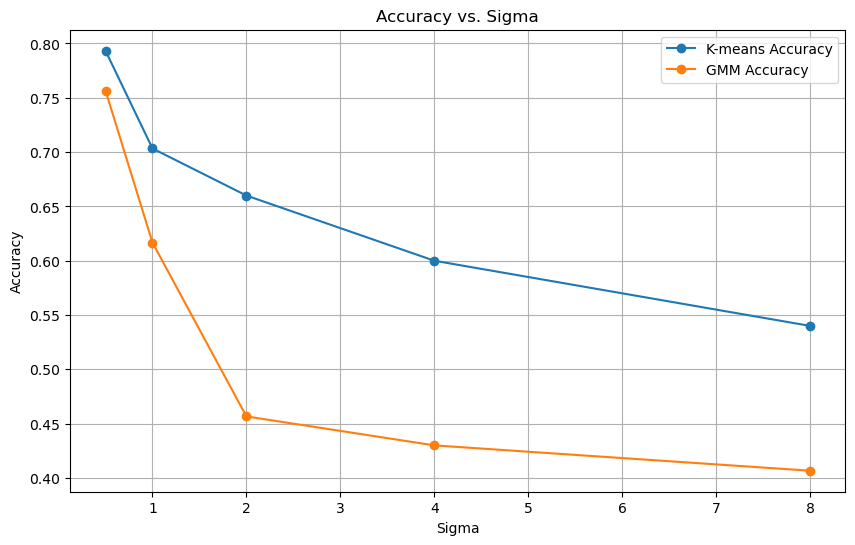

In [95]:

acc_kmm = np.zeros(5)
obj_kmm = np.zeros(5)
acc_gmm = np.zeros(5)
obj_gmm = np.zeros(5)
#np.random.seed(109)
for i in range(5):
    #109
    np.random.seed(17)
    X,y = generate_data(sigma[i])
    # X = data = np.vstack((np.random.multivariate_normal(mu[0], var[0] * sigma[i], 100), 
    #                   np.random.multivariate_normal(mu[1], var[1] * sigma[i], 100), 
    #                   np.random.multivariate_normal(mu[2], var[2] * sigma[i], 100)))


    KMM = KMeans(3)
    KMM.fit(X)
    acc_kmm[i] = KMM.cal_acc(y)
    obj_kmm[i]= KMM.cal_obj()

    


    # GMM = GaussianMixtureModel(3)
    # GMM.fit(X)
    # acc_gmm[i]= GMM.cal_acc(y)
    # obj_gmm[i] = GMM.cal_obj()


for i in range(5):
    np.random.seed(120)
    X,y = generate_data(sigma[i])
    GMM = GaussianMixtureModel(3)
    GMM.fit(X)
    acc_gmm[i]= GMM.cal_acc(y)
    obj_gmm[i] = GMM.cal_obj()




    

# print(acc_kmm)
# print(acc_gmm)


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(sigma, acc_kmm, marker='o', label='K-means Accuracy')
plt.plot(sigma, acc_gmm, marker='o', label='GMM Accuracy')

plt.title('Accuracy vs. Sigma')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
#plt.xticks(sigma)

plt.legend(loc='best') 
plt.grid(True)
plt.savefig('/Users/zexuansun/Desktop/CS760/hw5_pic/q11.png',dpi = 200)
plt.show()

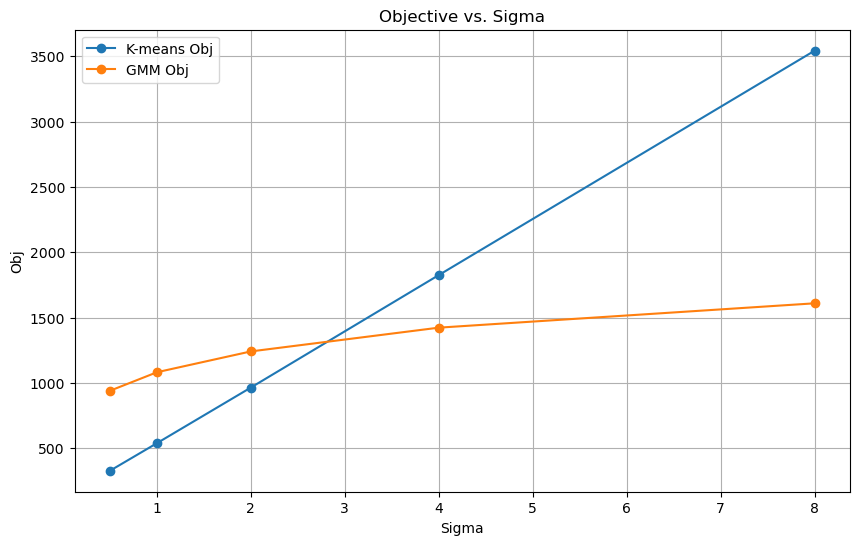

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(sigma, obj_kmm, marker='o', label='K-means Obj')
plt.plot(sigma, obj_gmm, marker='o', label='GMM Obj')

plt.title('Objective vs. Sigma')
plt.xlabel('Sigma')
plt.ylabel('Obj')
#plt.xticks(sigma)

plt.legend(loc='best') 
plt.grid(True)
plt.savefig('/Users/zexuansun/Desktop/CS760/hw5_pic/q12.png',dpi = 200)
plt.show()

In [36]:
# import numpy as np
# from scipy import random
# from matplotlib.patches import Ellipse
# import matplotlib.transforms as transforms
# from scipy.stats import multivariate_normal

# class GMM():
#     def __init__(self, k, dim, init_mu=None, init_sigma=None, init_pi=None, colors=None):
#         '''
#         Define a model with known number of clusters and dimensions.
#         input:
#             - k: Number of Gaussian clusters
#             - dim: Dimension 
#             - init_mu: initial value of mean of clusters (k, dim)
#                        (default) random from uniform[-10, 10]
#             - init_sigma: initial value of covariance matrix of clusters (k, dim, dim)
#                           (default) Identity matrix for each cluster
#             - init_pi: initial value of cluster weights (k,)
#                        (default) equal value to all cluster i.e. 1/k
#             - colors: Color valu for plotting each cluster (k, 3)
#                       (default) random from uniform[0, 1]
#         '''
#         self.k = k
#         self.dim = dim
#         if(init_mu is None):
#             init_mu = random.rand(k, dim)*20 - 10
#         self.mu = init_mu
#         if(init_sigma is None):
#             init_sigma = np.zeros((k, dim, dim))
#             for i in range(k):
#                 init_sigma[i] = np.eye(dim)
#         self.sigma = init_sigma
#         if(init_pi is None):
#             init_pi = np.ones(self.k)/self.k
#         self.pi = init_pi
#         if(colors is None):
#             colors = random.rand(k, 3)
#         self.colors = colors
    
#     def init_em(self, X):
#         '''
#         Initialization for EM algorithm.
#         input:
#             - X: data (batch_size, dim)
#         '''
#         self.data = X
#         self.num_points = X.shape[0]
#         self.z = np.zeros((self.num_points, self.k))
    
#     def e_step(self):
#         '''
#         E-step of EM algorithm.
#         '''
#         for i in range(self.k):
#             self.z[:, i] = self.pi[i] * multivariate_normal.pdf(self.data, mean=self.mu[i], cov=self.sigma[i])
#         self.z /= self.z.sum(axis=1, keepdims=True)
    
#     def m_step(self):
#         '''
#         M-step of EM algorithm.
#         '''
#         sum_z = self.z.sum(axis=0)
#         self.pi = sum_z / self.num_points
#         self.mu = np.matmul(self.z.T, self.data)
#         self.mu /= sum_z[:, None]
#         for i in range(self.k):
#             j = np.expand_dims(self.data, axis=1) - self.mu[i]
#             s = np.matmul(j.transpose([0, 2, 1]), j)
#             self.sigma[i] = np.matmul(s.transpose(1, 2, 0), self.z[:, i] )
#             self.sigma[i] /= sum_z[i]
            
#     def log_likelihood(self, X):
#         '''
#         Compute the log-likelihood of X under current parameters
#         input:
#             - X: Data (batch_size, dim)
#         output:
#             - log-likelihood of X: Sum_n Sum_k log(pi_k * N( X_n | mu_k, sigma_k ))
#         '''
#         ll = []
#         for d in X:
#             tot = 0
#             for i in range(self.k):
#                 tot += self.pi[i] * multivariate_normal.pdf(d, mean=self.mu[i], cov=self.sigma[i])
#             ll.append(np.log(tot))
#         return np.sum(ll)
    

    
#     def predict(self,X):

    
#     def plot_gaussian(self, mean, cov, ax, n_std=3.0, facecolor='none', **kwargs):
#         '''
#         Utility function to plot one Gaussian from mean and covariance.
#         '''
#         pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
#         ell_radius_x = np.sqrt(1 + pearson)
#         ell_radius_y = np.sqrt(1 - pearson)
#         ellipse = Ellipse((0, 0),
#             width=ell_radius_x * 2,
#             height=ell_radius_y * 2,
#             facecolor=facecolor,
#             **kwargs)
#         scale_x = np.sqrt(cov[0, 0]) * n_std
#         mean_x = mean[0]
#         scale_y = np.sqrt(cov[1, 1]) * n_std
#         mean_y = mean[1]
#         transf = transforms.Affine2D() \
#             .rotate_deg(45) \
#             .scale(scale_x, scale_y) \
#             .translate(mean_x, mean_y)
#         ellipse.set_transform(transf + ax.transData)
#         return ax.add_patch(ellipse)

#     def draw(self, ax, n_std=2.0, facecolor='none', **kwargs):
#         '''
#         Function to draw the Gaussians.
#         Note: Only for two-dimensionl dataset
#         '''
#         if(self.dim != 2):
#             print("Drawing available only for 2D case.")
#             return
#         for i in range(self.k):
#             self.plot_gaussian(self.mu[i], self.sigma[i], ax, n_std=n_std, edgecolor=self.colors[i], **kwargs)

# Q 2.3

In [37]:
import numpy as np

class myPCA:
    def __init__(self, d):
        self.n_components = d
        self.mean = None
        self.components = None

    def fit(self, X,method = 1):
        self.method = method
        # Step 1: Mean-center the data
        self.mean = np.mean(X, axis=0)
        self.sd = np.std(X,axis = 0)
        
        if method == 1:
            centered_data = X
        
        elif method == 2:
    
            centered_data = X - self.mean
            
        else:
            centered_data = (X - self.mean)/self.sd

        # Step 2: Perform SVD
        U, S, Vt = np.linalg.svd(centered_data)

        # Step 3: Select the top n_components right singular vectors from Vt
        self.V = Vt[:self.n_components, :].T # dim D * d

    def transform(self, X):
        n = X.shape[0]
        # Project the data onto the selected principal components
        if self.method == 1:
            Z = np.dot(X,self.V)
            X_re = np.dot(Z,self.V.T)
        elif self.method == 2:
            Z = np.dot(X-self.mean,self.V)
            X_re = np.dot(Z,self.V.T)
            X_re = X_re + self.mean
        elif self.method ==3:
            Z = np.dot((X-self.mean)/self.sd,self.V)
            X_re = np.dot(Z,self.V.T)
            X_re *= self.sd
            X_re += self.mean

        return Z, X_re, np.linalg.norm(X-X_re)**2 / n





class DRO:
    def __init__(self, d):
        self.n_components = d
    

    def fit(self, X):
        b = np.mean(X,axis = 0)[:,None]
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        n = X.shape[0]
        U, D, Vt = np.linalg.svd(X)
        D = np.diag(D[:self.n_components])
        U = U[:,:self.n_components]
        Vt = Vt[:self.n_components,:]

        Z = np.sqrt(n)  * U
        At = 1 / np.sqrt(n) * D @ Vt



    

        self.Z = Z
        self.A = At.T
        self.b= b
       
        return  self.Z, self.A, self.b 

    def transform(self,X):
        n = X.shape[0]

        yi = np.ones((n,1))
        X_re = self.Z @ self.A.T  + yi @ self.b.T   
        return  X_re, np.linalg.norm(X-X_re)**2 / n

In [4]:
import pandas as pd
dat1 = pd.read_csv('/Users/zexuansun/Downloads/data/data2D.csv',header=None)
X = dat1.values

PCA1 = myPCA(1)

PCA1.fit(X)
_, X_re1, err1 = PCA1.transform(X)
print(err1)

PCA2 = myPCA(1)

PCA2.fit(X,2)
_, X_re2, err2= PCA2.transform(X)
print(err2)


PCA3 = myPCA(1)

PCA3.fit(X,3)
_, X_re3, err3= PCA3.transform(X)

print(err3)

ord = DRO(1)

Z,A,b = ord.fit(X)

X_reord,err4 = ord.transform(X)
print(err4)





0.886903083734794
0.010006085628512908
0.049472083454770666
0.010006085628512911


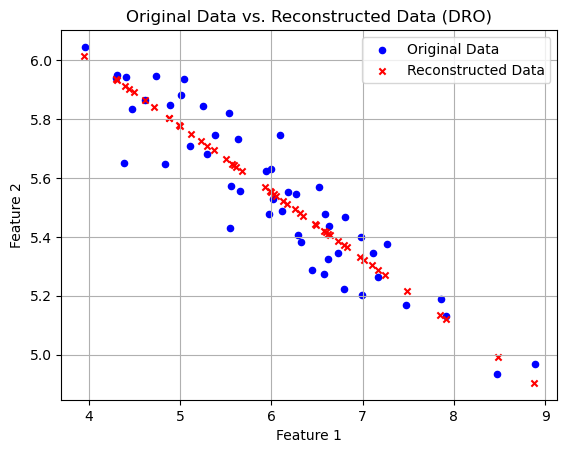

In [5]:
import matplotlib.pyplot as plt

reconstructed_data = X_reord

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', label='Original Data',s = 20)

# Create a scatter plot for the reconstructed data (red crosses)
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], c='red', marker='x', label='Reconstructed Data',s=20)

plt.title('Original Data vs. Reconstructed Data (DRO)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.savefig('/Users/zexuansun/Desktop/CS760/hw5_pic/q21.png',dpi = 200)
plt.show()

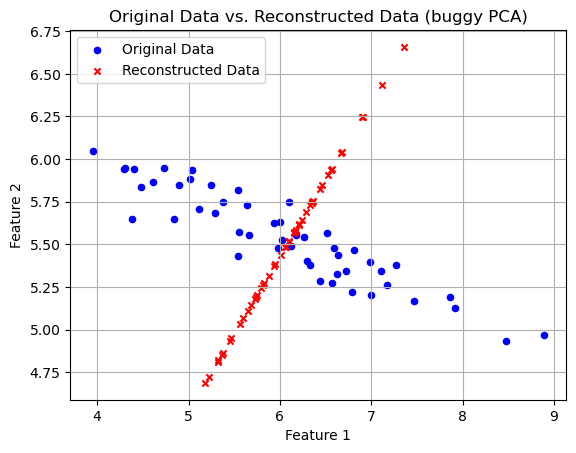

In [6]:
reconstructed_data = X_re1

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', label='Original Data',s = 20)

# Create a scatter plot for the reconstructed data (red crosses)
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], c='red', marker='x', label='Reconstructed Data',s=20)

plt.title('Original Data vs. Reconstructed Data (buggy PCA)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.savefig('/Users/zexuansun/Desktop/CS760/hw5_pic/q22.png',dpi = 200)
plt.show()

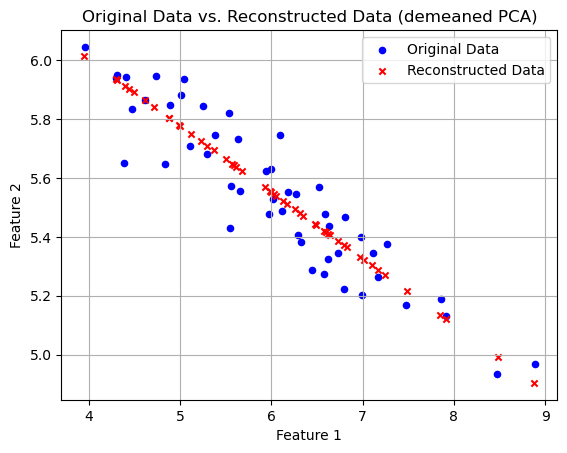

In [7]:
reconstructed_data = X_re2

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', label='Original Data',s = 20)

# Create a scatter plot for the reconstructed data (red crosses)
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], c='red', marker='x', label='Reconstructed Data',s=20)

plt.title('Original Data vs. Reconstructed Data (demeaned PCA)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.savefig('/Users/zexuansun/Desktop/CS760/hw5_pic/q23.png',dpi = 200)
plt.show()

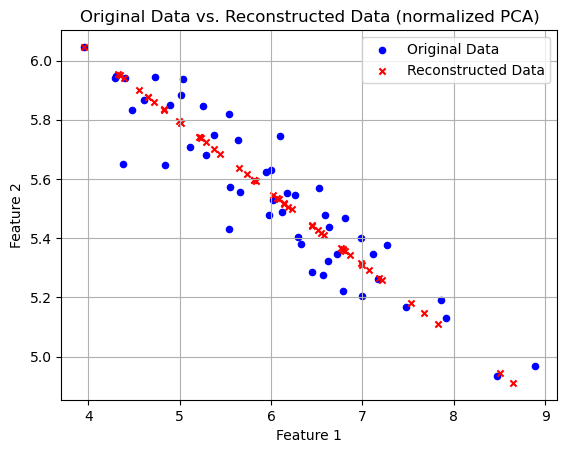

In [8]:
reconstructed_data = X_re3

plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', label='Original Data',s = 20)

# Create a scatter plot for the reconstructed data (red crosses)
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], c='red', marker='x', label='Reconstructed Data',s=20)

plt.title('Original Data vs. Reconstructed Data (normalized PCA)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.savefig('/Users/zexuansun/Desktop/CS760/hw5_pic/q24.png',dpi = 200)
plt.show()

In [38]:
import pandas as pd
dat2 = pd.read_csv('/Users/zexuansun/Downloads/data/data1000D.csv',header=None)
X = dat2.values
U, D, Vt = np.linalg.svd(X-np.mean(X, axis=0))



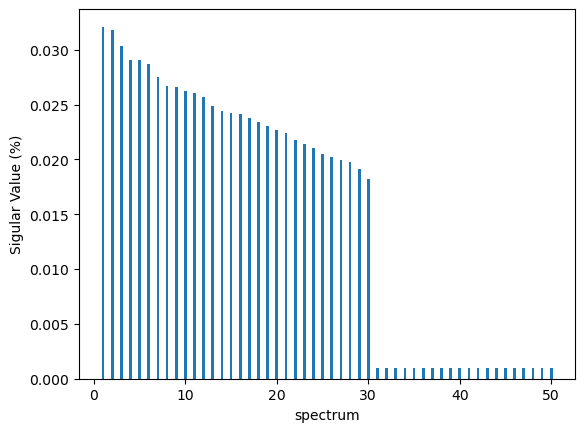

In [54]:
plt.bar(np.arange(50)+1,  (D/np.sum(D))[:50]  ,width=0.3)
plt.ylabel('Sigular Value (%)')
plt.xlabel('spectrum')
plt.savefig('/Users/zexuansun/Desktop/CS760/hw5_pic/q2spec.png',dpi = 200)
plt.show()

In [53]:
X = dat2.values
d = 30
PCA1 = myPCA(d)

PCA1.fit(X)
_, X_re1, err1 = PCA1.transform(X)
print(err1)

PCA2 = myPCA(d)

PCA2.fit(X,2)
_, X_re2, err2= PCA2.transform(X)
print(err2)


PCA3 = myPCA(d)

PCA3.fit(X,3)
_, X_re3, err3= PCA3.transform(X)

print(err3)

ord = DRO(d)

Z,A,b = ord.fit(X)

X_reord,err4 = ord.transform(X)
print(err4)


802.7313986203586
273.04595897860287
273.62858099762326
273.04595897860287
